In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [3]:
#read in preprocessed_df.csv
df = pd.read_csv('data/preprocessed_df.csv')
#move target variable(DepDelay) to the end
df = df[[c for c in df if c not in ['DepDelay']] + ['DepDelay']]
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportSeqID,...,Distance,DaysSince,is_holiday,is_day_before_holiday,is_holiday_week,MinSince,OriginFlightDensity,Visibility,WindSpeed,DepDelay
0,2014,1,1,1,3,2014-01-01,OO,N724SK,4974,1039705,...,689.0,0,1,0,1,360,2.0,10.0,5.0,-3.0
1,2014,1,1,1,3,2014-01-01,AA,N002AA,1315,1039705,...,731.0,0,1,0,1,420,3.0,10.0,5.0,-2.0
2,2014,1,1,1,3,2014-01-01,UA,N76288,1134,1039705,...,606.0,0,1,0,1,427,3.0,10.0,5.0,2.0
3,2014,1,1,1,3,2014-01-01,DL,N709DN,110,1039705,...,1947.0,0,1,0,1,490,6.0,10.0,3.0,21.0
4,2014,1,1,1,3,2014-01-01,DL,N654DL,1347,1039705,...,2139.0,0,1,0,1,495,6.0,10.0,3.0,-2.0


In [4]:
#reason for removal
#DaysSince, MinSince - Used to make other variables and dont provide any information
#FlightDate - Information is already in other columns(Year, Month, DayofMonth, DayOfWeek)
#is_holiday, is_day_before_holiday - is_holiday_week captures more information
df = df.drop(['DaysSince', 'is_holiday', 'is_day_before_holiday', 'MinSince', 'FlightDate'], axis=1)
print(df.columns, df.shape)

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline',
       'OriginAirportSeqID', 'Origin', 'OriginCityName', 'OriginState',
       'DestAirportSeqID', 'Dest', 'DestCityName', 'DestState', 'CRSDepTime',
       'CRSArrTime', 'Cancelled', 'Diverted', 'CRSElapsedTime', 'Distance',
       'is_holiday_week', 'OriginFlightDensity', 'Visibility', 'WindSpeed',
       'DepDelay'],
      dtype='object') (1639428, 27)


In [5]:
#turn all data into numerical data, using .factorize() to convert categorical data into numerical data
df_nums = df.apply(lambda x: pd.factorize(x)[0])
print("How the data was converted to numerical data: ")
#This shows the mapping of the categorical data to numerical data
print("Year: ", df['Year'].unique(), df_nums['Year'].unique())
print("Reporting_Airline: ", df['Reporting_Airline'].unique(), df_nums['Reporting_Airline'].unique())
print("Origin: ", df['Origin'].unique(), df_nums['Origin'].unique())
print("Dest: ", df['Dest'].unique(), df_nums['Dest'].unique())
print("Flight_Number_Reporting_Airliner: ", df['Flight_Number_Reporting_Airline'].unique(), df_nums['Flight_Number_Reporting_Airline'].unique())

How the data was converted to numerical data: 
Year:  [2014 2015 2016 2017 2018] [0 1 2 3 4]
Reporting_Airline:  ['OO' 'AA' 'UA' 'DL' 'WN'] [0 1 2 3 4]
Origin:  ['ATL' 'CLT' 'DEN' 'DFW' 'IAH' 'LAX' 'ORD' 'PHX' 'SFO'] [0 1 2 3 4 5 6 7 8]
Dest:  ['IAH' 'DFW' 'ORD' 'LAX' 'SFO' 'DEN' 'PHX' 'CLT' 'ATL'] [0 1 2 3 4 5 6 7 8]
Flight_Number_Reporting_Airliner:  [4974 1315 1134 ... 5993 2932 3699] [   0    1    2 ... 6274 6275 6276]


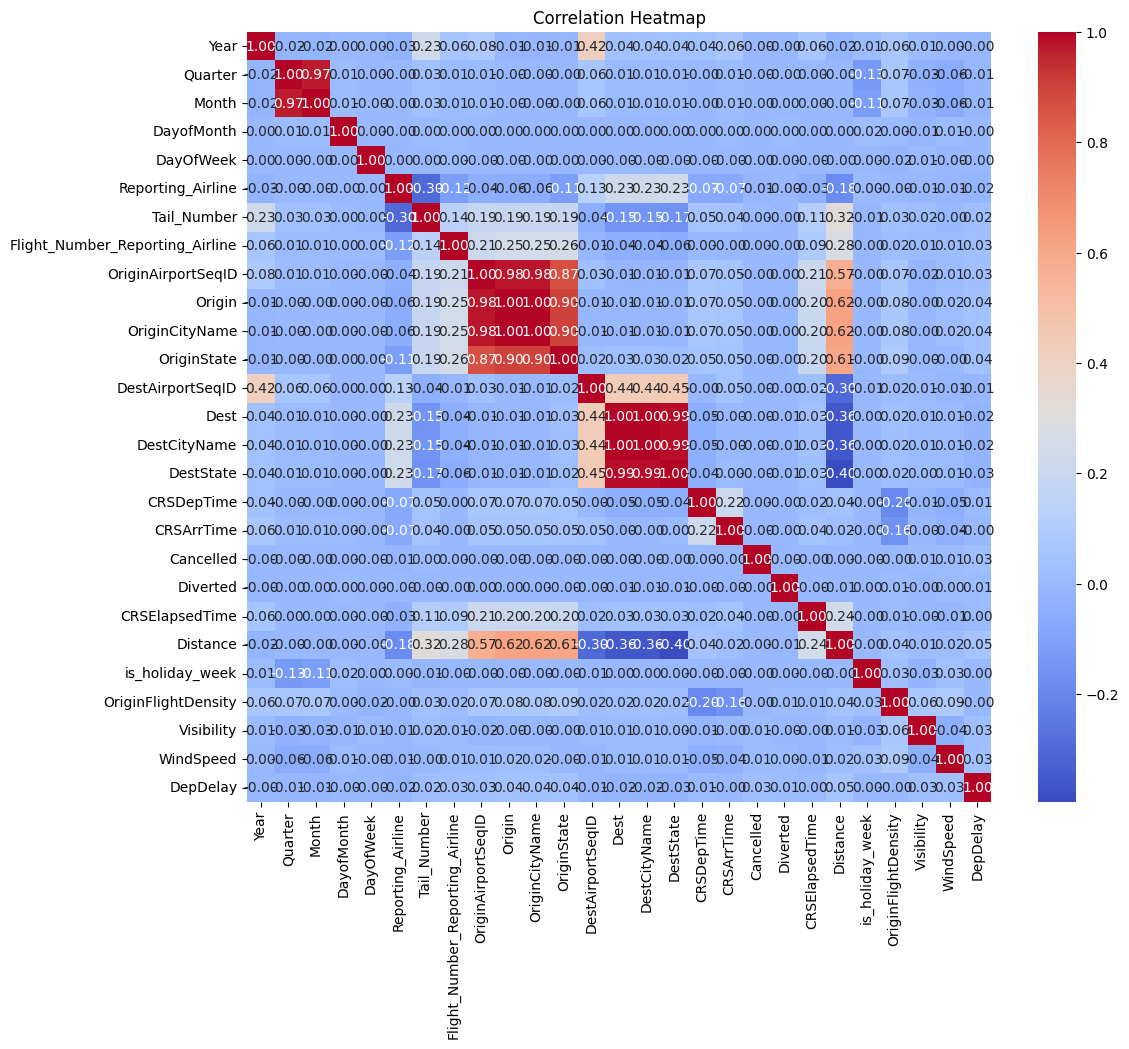

In [6]:
corr = df_nums.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

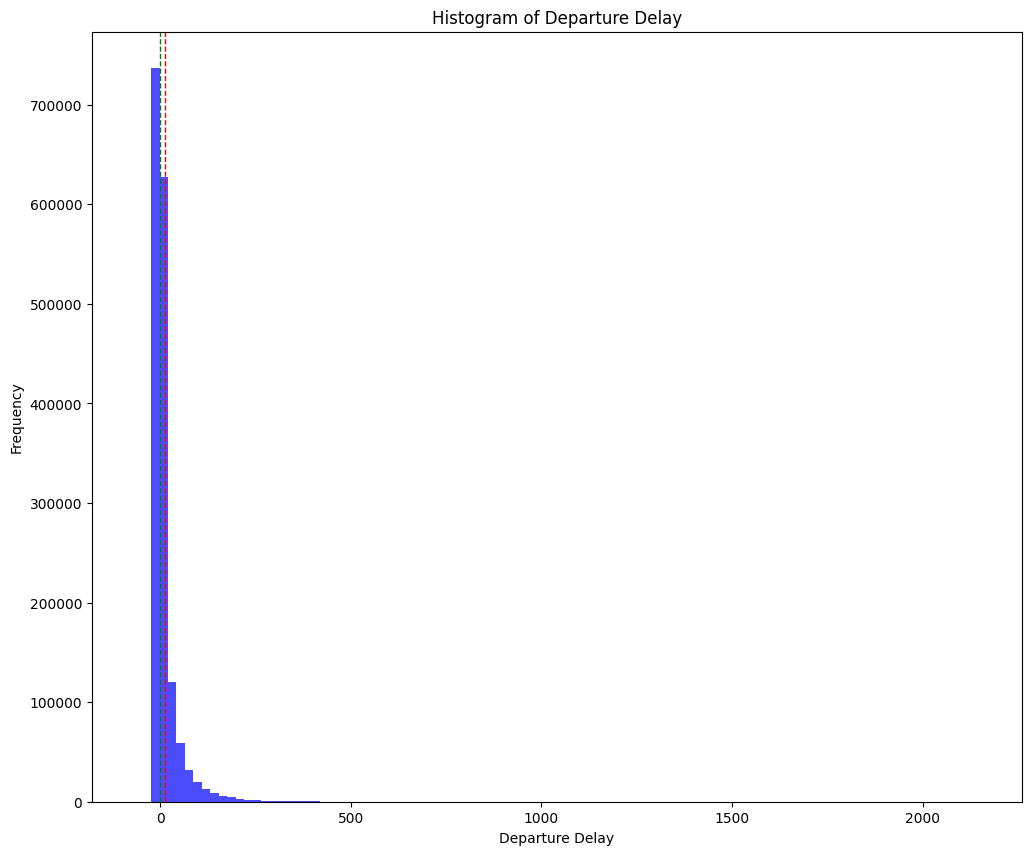

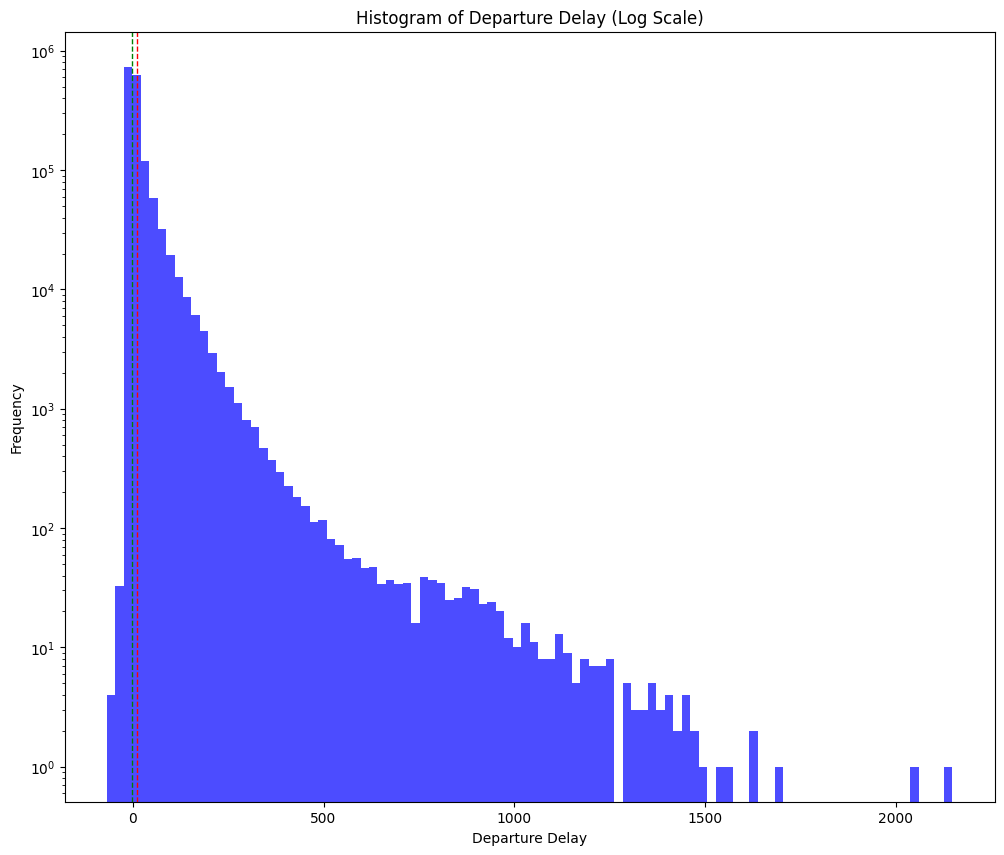

In [7]:
#histogram of departure delay frequency
plt.figure(figsize=(12, 10))
plt.hist(df['DepDelay'], bins=100, color='blue', alpha=0.7)
plt.xlabel('Departure Delay')
plt.ylabel('Frequency')
plt.title('Histogram of Departure Delay')
plt.axvline(df['DepDelay'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['DepDelay'].median(), color='green', linestyle='dashed', linewidth=1)
#plt.savefig('graphics/hist_dep_delay.png')

#and the logged version
plt.figure(figsize=(12, 10))
plt.hist(df['DepDelay'], bins=100, color='blue', alpha=0.7)
plt.xlabel('Departure Delay')
plt.ylabel('Frequency')
plt.title('Histogram of Departure Delay (Log Scale)')
plt.yscale('log')
plt.axvline(df['DepDelay'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['DepDelay'].median(), color='green', linestyle='dashed', linewidth=1)
#plt.savefig('graphics/hist_dep_delay_log.png')

In [8]:
#summary statistics about the departure delay
print('Min:', df['DepDelay'].min())
print('Max:', df['DepDelay'].max())
print('Mean:', df['DepDelay'].mean())
print('Median:', df['DepDelay'].median())
print('Mode:', df['DepDelay'].mode())
print('Standard Deviation:', df['DepDelay'].std())
print('Skew:', df['DepDelay'].skew())

Min: -68.0
Max: 2149.0
Mean: 11.53406553993222
Median: -1.0
Mode: 0   -3.0
Name: DepDelay, dtype: float64
Standard Deviation: 40.341350425245615
Skew: 8.48420257120976


Explained Variance:  [1.70822457e-01 1.27492786e-01 7.49421856e-02 5.55712449e-02
 5.10074137e-02 3.96313779e-02 3.91676763e-02 3.82327271e-02
 3.71997829e-02 3.69568762e-02 3.67518888e-02 3.62735643e-02
 3.54692615e-02 3.51498108e-02 3.42132027e-02 3.23617411e-02
 2.91503535e-02 2.78542058e-02 2.50448198e-02 1.65618893e-02
 1.25370997e-02 5.21654384e-03 1.08199047e-03 7.20885511e-04
 5.88214849e-04 1.84284943e-29 1.44948816e-31]


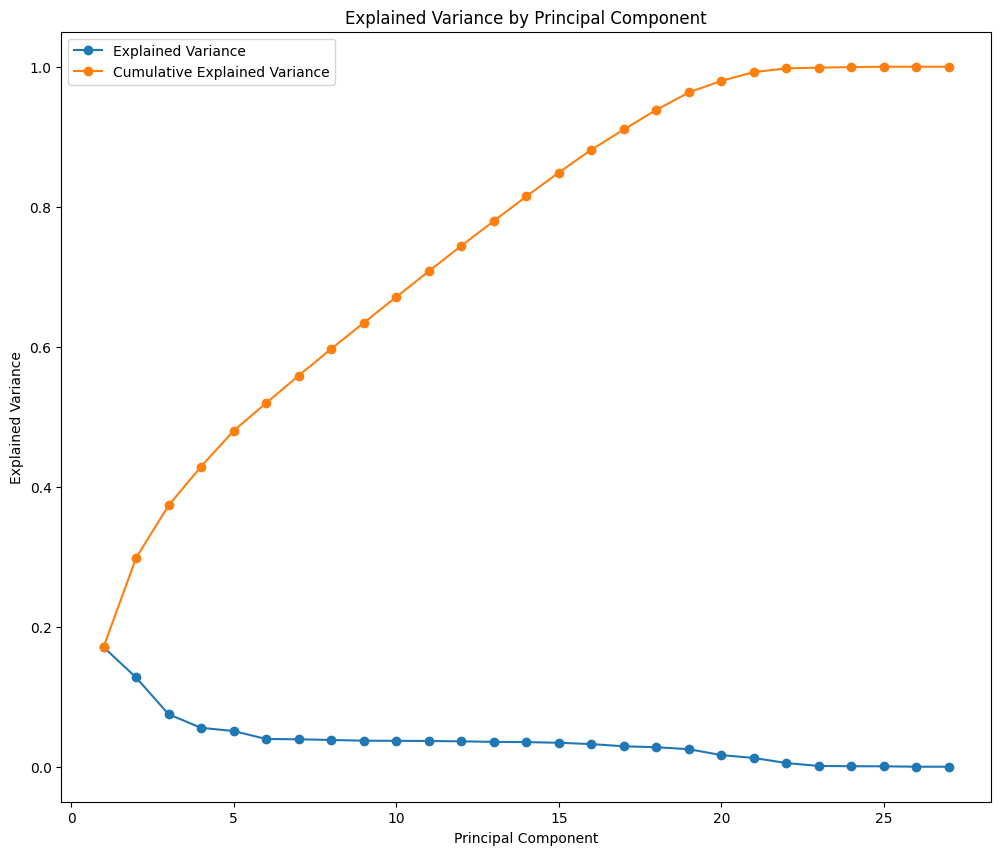

In [9]:
#Finding the principal components

#standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_nums)

#find the principal components
pca = PCA()
pca.fit(df_scaled)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance: ", explained_variance)

#plot the explained variance and cumulative explained variance
plt.figure(figsize=(12, 10))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label='Explained Variance')
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')
plt.legend()

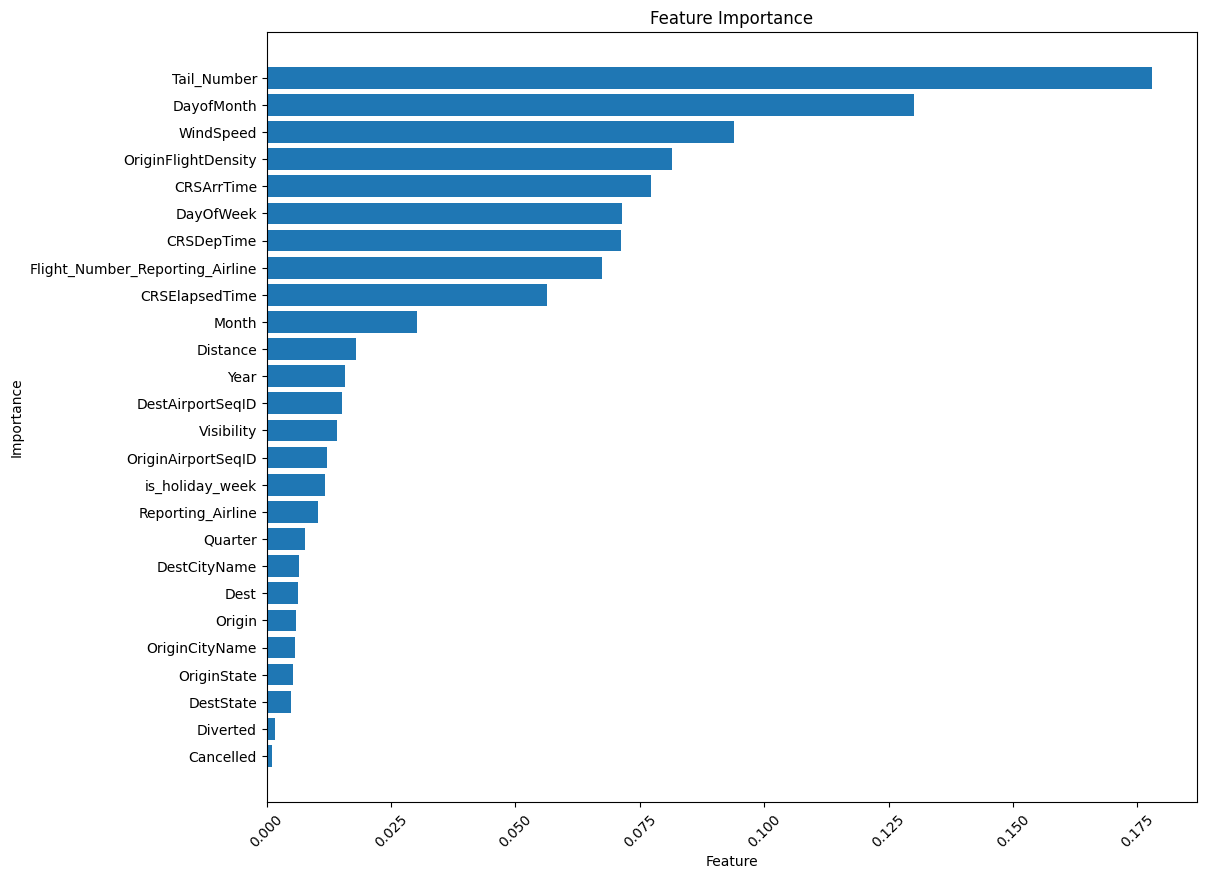

In [10]:
#create a dicision tree to find the most important features

#split the data into features and target
X = df_nums.drop('DepDelay', axis=1)
y = df_nums['DepDelay']

#fit the decision tree
tree = DecisionTreeRegressor()
tree.fit(X, y)

#plot the feature importances
plt.figure(figsize=(12, 10))
sorted_idx = tree.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], tree.feature_importances_[sorted_idx])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)

In [ ]:
#show the trees structure (takes a while to run)
plt.figure(figsize=(20, 20))
plot_tree(tree, feature_names=X.columns, filled=True)
plt.show()

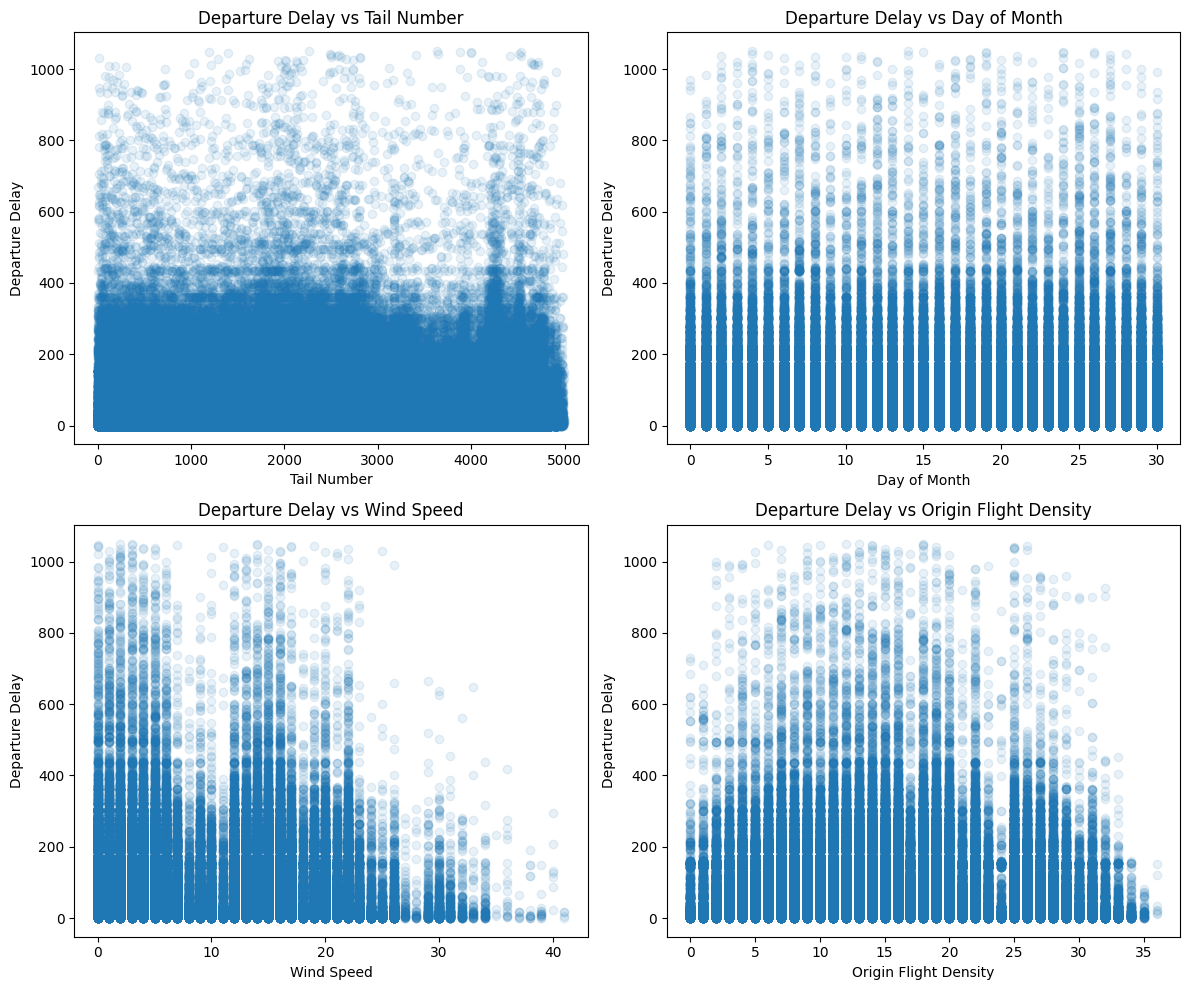

In [12]:
#create a 4x4 grid of scatter plots to show depdelay vs Tail_Number, DayofMonth, WindSpeed, and OriginFlightDensity
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].scatter(df_nums['Tail_Number'], df_nums['DepDelay'], alpha=0.1)
axs[0, 0].set_xlabel('Tail Number')
axs[0, 0].set_ylabel('Departure Delay')
axs[0, 0].set_title('Departure Delay vs Tail Number')

axs[0, 1].scatter(df_nums['DayofMonth'], df_nums['DepDelay'], alpha=0.1)
axs[0, 1].set_xlabel('Day of Month')
axs[0, 1].set_ylabel('Departure Delay')
axs[0, 1].set_title('Departure Delay vs Day of Month')

axs[1, 0].scatter(df_nums['WindSpeed'], df_nums['DepDelay'], alpha=0.1)
axs[1, 0].set_xlabel('Wind Speed')
axs[1, 0].set_ylabel('Departure Delay')
axs[1, 0].set_title('Departure Delay vs Wind Speed')

axs[1, 1].scatter(df_nums['OriginFlightDensity'], df_nums['DepDelay'], alpha=0.1)
axs[1, 1].set_xlabel('Origin Flight Density')
axs[1, 1].set_ylabel('Departure Delay')
axs[1, 1].set_title('Departure Delay vs Origin Flight Density')

plt.tight_layout()

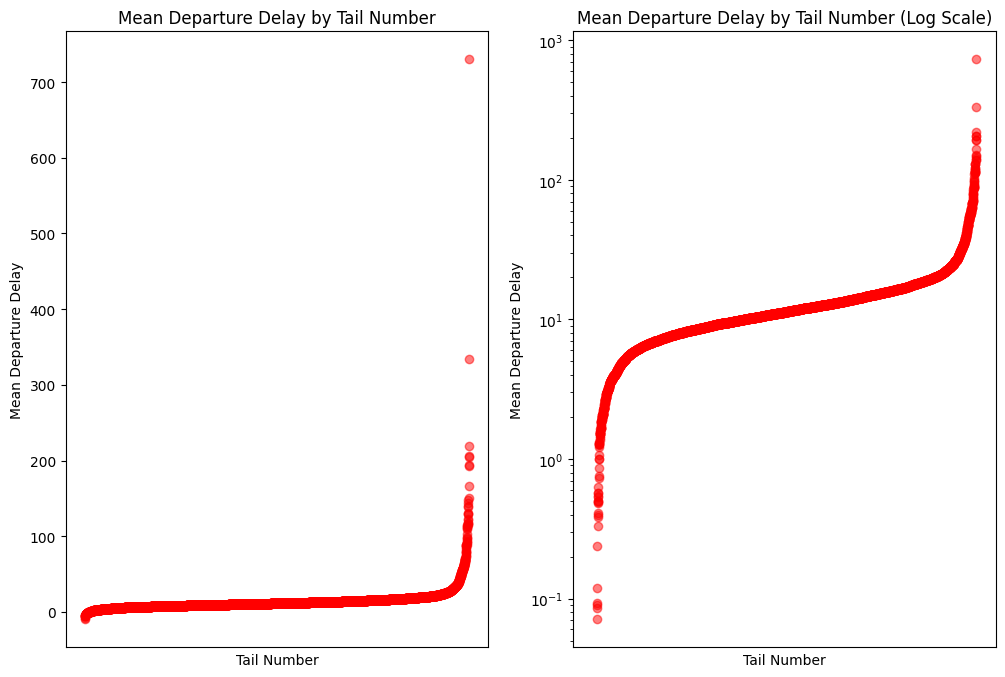

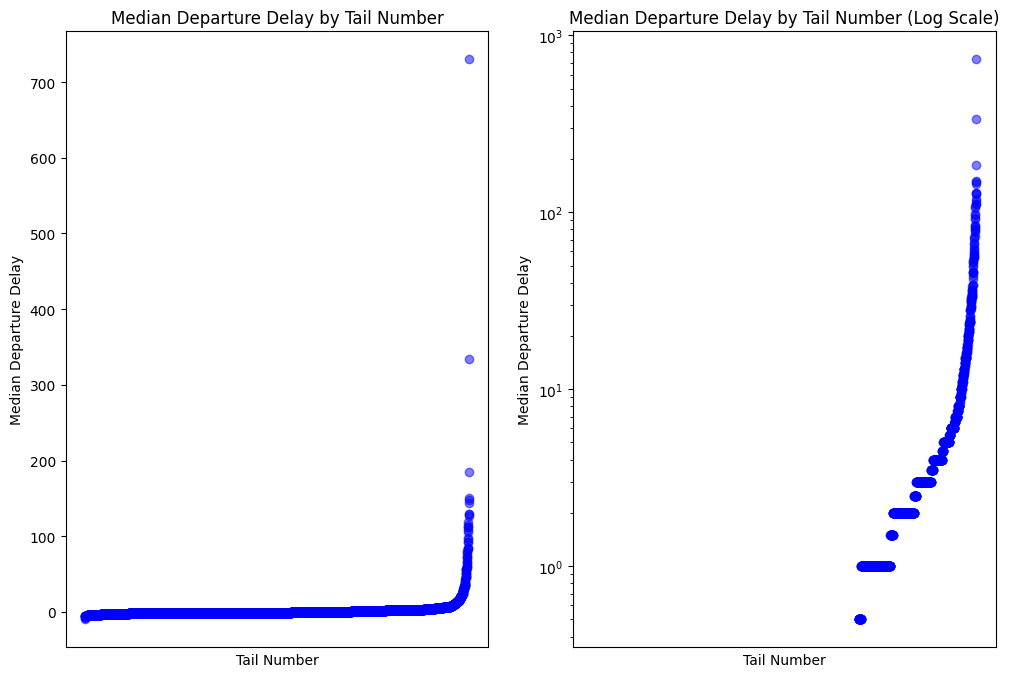

In [27]:
#Looking into why tail number is so important
#scatter plot of mean departure delay by tail number
mean_delay = df.groupby('Tail_Number')['DepDelay'].mean()
mean_delay = mean_delay.sort_values()

median_delay = df.groupby('Tail_Number')['DepDelay'].median()
median_delay = median_delay.sort_values()

#scatter plot of mean and median departure delay by tail number
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].scatter(mean_delay.index, mean_delay, color='red', alpha=0.5)
axs[0].set_xlabel('Tail Number')
axs[0].set_ylabel('Mean Departure Delay')
axs[0].set_title('Mean Departure Delay by Tail Number')
axs[0].set_xticks([])
axs[0].set_yscale('linear')

axs[1].scatter(mean_delay.index, mean_delay, color='red', alpha=0.5)
axs[1].set_xlabel('Tail Number')
axs[1].set_ylabel('Mean Departure Delay')
axs[1].set_title('Mean Departure Delay by Tail Number (Log Scale)')
axs[1].set_xticks([])
axs[1].set_yscale('log')

fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].scatter(median_delay.index, median_delay, color='blue', alpha=0.5)
axs[0].set_xlabel('Tail Number')
axs[0].set_ylabel('Median Departure Delay')
axs[0].set_title('Median Departure Delay by Tail Number')
axs[0].set_xticks([])
axs[0].set_yscale('linear')

axs[1].scatter(median_delay.index, median_delay, color='blue', alpha=0.5)
axs[1].set_xlabel('Tail Number')
axs[1].set_ylabel('Median Departure Delay')
axs[1].set_title('Median Departure Delay by Tail Number (Log Scale)')
axs[1].set_xticks([])
axs[1].set_yscale('log')



#Since tail number is specific to each plane, this shows that some planes are just "unlucky" or "lucky" when it comes to delays

Accuracy: 0.8346162995675326


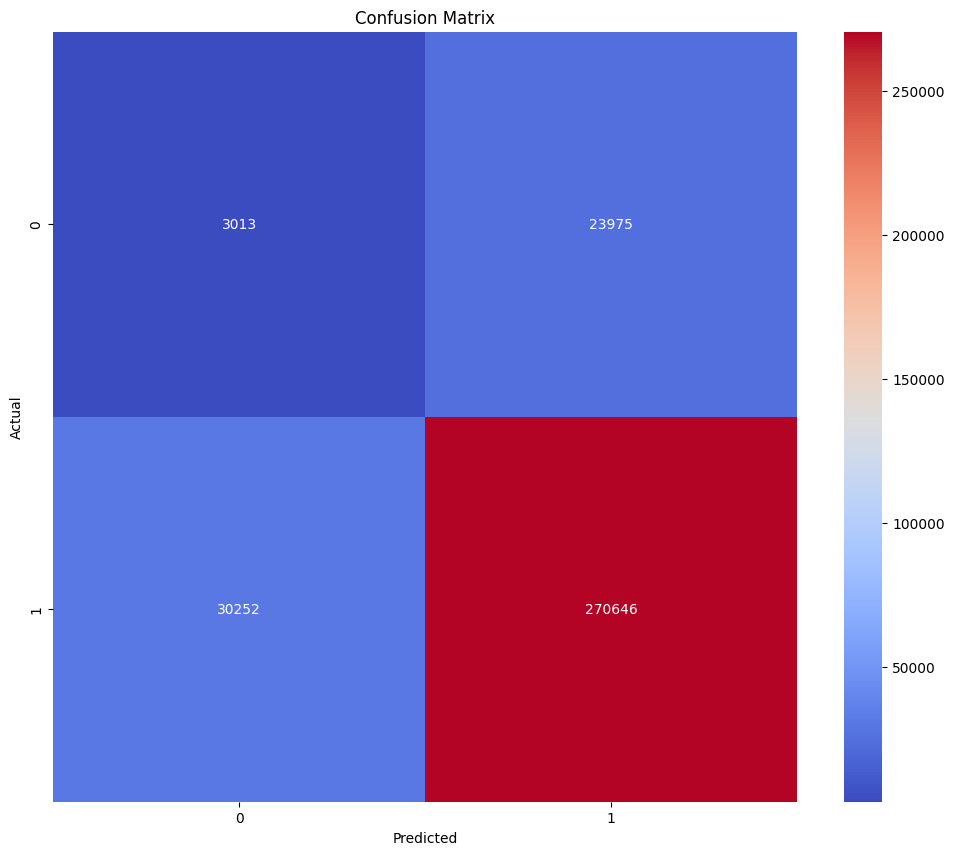

In [31]:
#make a confusion matrix for the decision tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#convert depdelay to binary (0 if on time or early, 1 if delayed)
y = df_nums['DepDelay'].apply(lambda x: 0 if x <= 0 else 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / len(y_test)
print('Accuracy:', accuracy)